# **Projeto Twitter - Recuperação da Informação na Web**

Para a realização deste projeto foram coletados twiteer com citações xxxx

# Importar bibliotecas

In [3]:
#Bibliotecas 
import tweepy
import pandas as pd     
import numpy as np 
import time
import os
import re


#Visualização
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

#Classificação de sentimento
from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# Linguagem natural
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

nltk.download('stopwords')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

#Mapas
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from geopy.geocoders import Nominatim


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lídia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Lídia\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lídia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Lídia\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lídia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lídia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pathlib import Path

Autenticando no Twitter

In [6]:
consumer_key        ='URTcfheoZ6QAjyieAXeBiFipo'
consumer_secret     ='AN81u9ZapIO5k4i0gVpQwVP0WTYzApSiX2aIC9C7oMTtXGPbHx'

access_token        ='1196924142903349248-bexqw6e33RVl9Prz4aWR7m3LIELsB8'
access_token_secret ='vk5hVxCMvUTz1O4k0AXTqPKnDahwUDfeLs0u9Uk7pgatj'

# **Tweepy**

O tweepy é uma biblioteca python que nos permite acessar facilmente a API do Twitter.

In [7]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [8]:
api = tweepy.API(auth,wait_on_rate_limit=True)

Nesta etapa iremos realizar a busca do termo escolhido para que possamos analisar.

In [9]:
tweets = []
info = []

for tweet in tweepy.Cursor(api.search,
                           q="queimadas" or "pantanal",
                           tweet_mode='extended',
                           rpp=100,
                           result_type="popular",
                           include_entities=True,
                           lang="pt").items(1500):
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open("TweetsQueimadas.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()
    
    time.sleep(0.5)

In [10]:
for tweet in tweets:
    print(tweet)

Balanço da Semana: Cidades+Verdes CAU / Cadastro Ambiental Rural Audiência Pública  Combate às Queimadas no Pantanal https://t.co/KLfpRsMOs5
Mesmo com os focos de incêndio que acometem o Pantanal e outros biomas brasileiros, a área queimada em todo o território nacional é a menor dos últimos 18 anos. Dados do @inpe_mct revelam que 2007 foi o ano em que o Brasil mais sofreu com as queimadas. https://t.co/3CMD2YZdA4
As queimadas não são novidade. Felizmente, a situação recente é MUITO melhor do que já foi. Os fatos evidenciam que toda a histeria em torno da questão ambiental não passa de narrativa mentirosa, criada para desgastar o Governo do Brasil e seus representantes. https://t.co/BaXcPtHuSI
Imagine só você fazer parte de um grupo de Facebook ou WhatsApp e quando alguém manda uma foto mostrando a floresta pegando fogo ou um animal morto pelas queimadas você imediatamente considera ele um inimigo “comunista”... significa que você se tornou um monstro e não percebeu...
F. Recursos para

Armazenando os tweets em um dataframe, deixamos no dataframe apenas as colunas que iremos trabalhar e renomeamos para facilitar e também foi criado um arquivo csv para armazenar os tweets coletados.

In [11]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['RTs']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])

#Criando um arquivo CSV
tweets_df.to_csv("TweetsQueimadas.csv")

In [12]:
#Resultado Dataframe
tweets_df.head(50)

,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates
0,Balanço da Semana: Cidades+Verdes CAU / Cadast...,140,1309680288965025793,2020-09-26 02:24:48,Twitter for iPhone,7083,1368,"São Paulo, Brasil",None,None
1,Mesmo com os focos de incêndio que acometem o ...,276,1309870492174745601,2020-09-26 15:00:36,Twitter Web App,2917,805,,None,None
2,"As queimadas não são novidade. Felizmente, a s...",284,1309633736909230086,2020-09-25 23:19:49,Twitter Web App,2424,734,,None,None
3,Imagine só você fazer parte de um grupo de Fac...,280,1309462619594600449,2020-09-25 11:59:51,Twitter for iPhone,3451,424,"Sao Paulo, Brazil",None,None
4,F. Recursos para o enfrentamento às chamas do ...,301,1309445792969699328,2020-09-25 10:53:00,Twitter for iPhone,5793,1297,"Brasília, Brasil",None,None
5,“Índios e caboclos?” PF já tem provas para ind...,165,1309466879661150208,2020-09-25 12:16:47,Twitter for iPhone,814,267,"São Paulo, Brasil",None,None
6,Informações sobre as queimadas. Compartilhe pa...,121,1309496416377634817,2020-09-25 14:14:09,Twitter for Android,781,266,"São Paulo, Brasil",None,None
7,O gov reduziu as verbas p/ brigadas de incêndi...,279,1309886128254783490,2020-09-26 16:02:44,Twitter for Android,1549,375,Brasil,None,None
8,Não há país que preserve como o Brasil! Além d...,251,1309844066155323395,2020-09-26 13:15:35,Twitter Web App,676,190,,None,None
9,Meu agradecimento para a equipe de brigadista...,190,1309278892390309890,2020-09-24 23:49:47,Twitter for iPhone,7037,1287,"São Paulo, Brasil",None,None


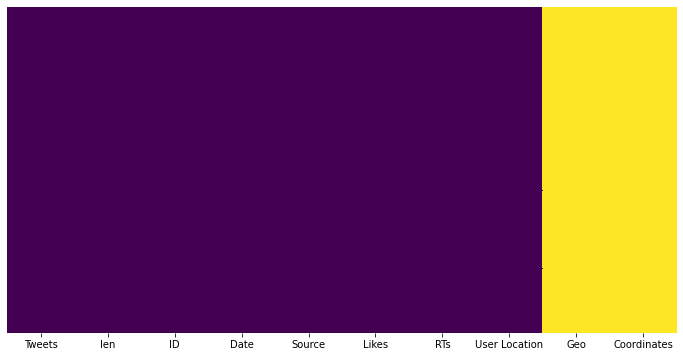

In [13]:
# Plotar um heatmap que apresenta quais colunas possuem a maior quantidade de dados ausentes
plt.figure(figsize=(12,6))
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Primeiro iremos verificar qual foi o tweet do termo pesquisado que houve mais curtidas e os que tiveram maior número de retweets

In [59]:
fav_max = np.max(tweets_df['Likes'])
rt_max  = np.max(tweets_df['RTs'])

fav_min = np.min(tweets_df['Likes'])
rt_min  = np.min(tweets_df['RTs'])

fav = tweets_df[tweets_df.Likes == fav_max].index[0]
rt  = tweets_df[tweets_df.RTs == rt_max].index[0]

fav_m = tweets_df[tweets_df.Likes == fav_min].index[0]
rt_m  = tweets_df[tweets_df.RTs == rt_min].index[0]

# Max FAVs:
print("O tweet com mais curtidas é: \n{}".format(tweets_df['Tweets'][fav]))
print("Número de curtidas: {}".format(fav_max))
print("\n")
# Max RTs:
print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("\n")
# Min FAVs:
print("O tweet com menos curtidas é: \n{}".format(tweets_df['Tweets'][fav_m]))
print("Número de curtidas: {}".format(fav_min))
print("\n")
# Min RTs:
print("O tweet com menos retweet é: \n{}".format(tweets_df['Tweets'][rt_m]))
print("Número de retweets: {}".format(rt_min))

O tweet com mais curtidas é: 
Avião de Bolsonaro é obrigado a arremeter por causa de queimadas em MT https://t.co/rGLl64vQaN #G1 https://t.co/w3IXL1MwV4
Número de curtidas: 21335


O tweet com mais retweet é: 
DOAÇÕES PARA OS POVOS INDÍGENAS ATINGIDOS PELAS QUEIMADAS NO PANTANAL DE MATO GROSSO (MT)  Caixa Econômica Federal Agência: 0016 Op: 013 - Conta Poupança Conta: 00082342-1  Favorecido: Federação dos Povos e Organizações Indígenas de Mato Grosso  CNPJ: 32.678.220/0001-65  +++
Número de retweets: 3616


O tweet com menos curtidas é: 
Ainda neste ano, o Inpe também registrou a maior taxa já contabilizada de focos de incêndio no bioma, foram 15.756 registrados https://t.co/tTwdGL1Djj
Número de curtidas: 77


O tweet com menos retweet é: 
Ainda neste ano, o Inpe também registrou a maior taxa já contabilizada de focos de incêndio no bioma, foram 15.756 registrados https://t.co/tTwdGL1Djj
Número de retweets: 20


In [15]:
# Visualizar os tweets que tiveram mais likes

top_likes=tweets_df.sort_values(by='Likes', ascending=False)
top_likes[:10]

,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates
28,Avião de Bolsonaro é obrigado a arremeter por ...,122,1306971621039710208,2020-09-18 15:01:31,TweetDeck,21335,2040,Brasil,None,None
23,"Estados Unidos, Australia, Argentina, Ártico, ...",300,1307109601100341248,2020-09-19 00:09:48,Twitter for iPhone,10794,2451,"São Paulo, Brasil",None,None
27,O avião de Bolsonaro arremeteu hoje no Mato Gr...,259,1307013569922445314,2020-09-18 17:48:12,Twitter for Android,9542,1177,,None,None
0,Balanço da Semana: Cidades+Verdes CAU / Cadast...,140,1309680288965025793,2020-09-26 02:24:48,Twitter for iPhone,7083,1368,"São Paulo, Brasil",None,None
9,Meu agradecimento para a equipe de brigadista...,190,1309278892390309890,2020-09-24 23:49:47,Twitter for iPhone,7037,1287,"São Paulo, Brasil",None,None
25,Discurso de Bolsonaro na ONU: as versões e os ...,299,1308417043977437184,2020-09-22 14:45:07,Twitter for iPhone,7002,1680,"Rio de Janeiro, Brasil",None,None
24,O avião de Bolsonaro teve que arremeter por ca...,233,1307038033473142785,2020-09-18 19:25:25,Twitter Web App,6686,1172,,None,None
4,F. Recursos para o enfrentamento às chamas do ...,301,1309445792969699328,2020-09-25 10:53:00,Twitter for iPhone,5793,1297,"Brasília, Brasil",None,None
26,"Racismo é estarmos em 2020 com negros, indígen...",275,1307390019909423112,2020-09-19 18:44:05,Twitter for iPhone,5099,1381,,None,None
18,DOAÇÕES PARA OS POVOS INDÍGENAS ATINGIDOS PELA...,275,1307500501743865856,2020-09-20 02:03:06,Twitter for iPhone,4257,3616,,None,None


Tweets por dia

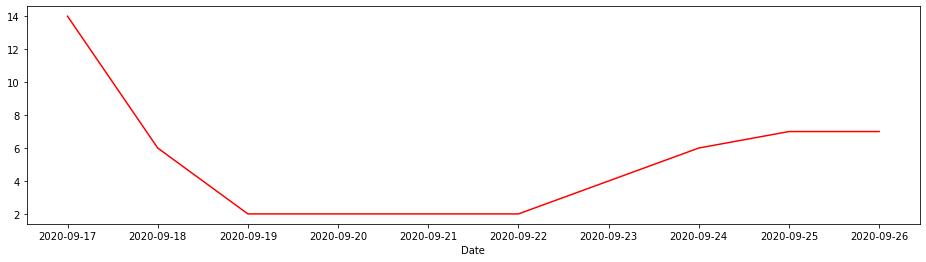

In [16]:
data = tweets_df

data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.date())

tlen = pd.Series(data['Date'].value_counts(), index=data['Date'])
tlen.plot(figsize=(16,4), color='r');

Verificar quantas vezes por dia houve um retweet

In [17]:
# Separar os dados da coluna Date em 4 colunas (dia, mês, ano e hora)

tweets_df['Date'] = pd.to_datetime(tweets_df['Date'])

tweets_df['year']= tweets_df['Date'].dt.year
tweets_df['Month']= tweets_df['Date'].dt.month
tweets_df['hour']= tweets_df['Date'].dt.hour
tweets_df['day']= tweets_df['Date'].dt.day

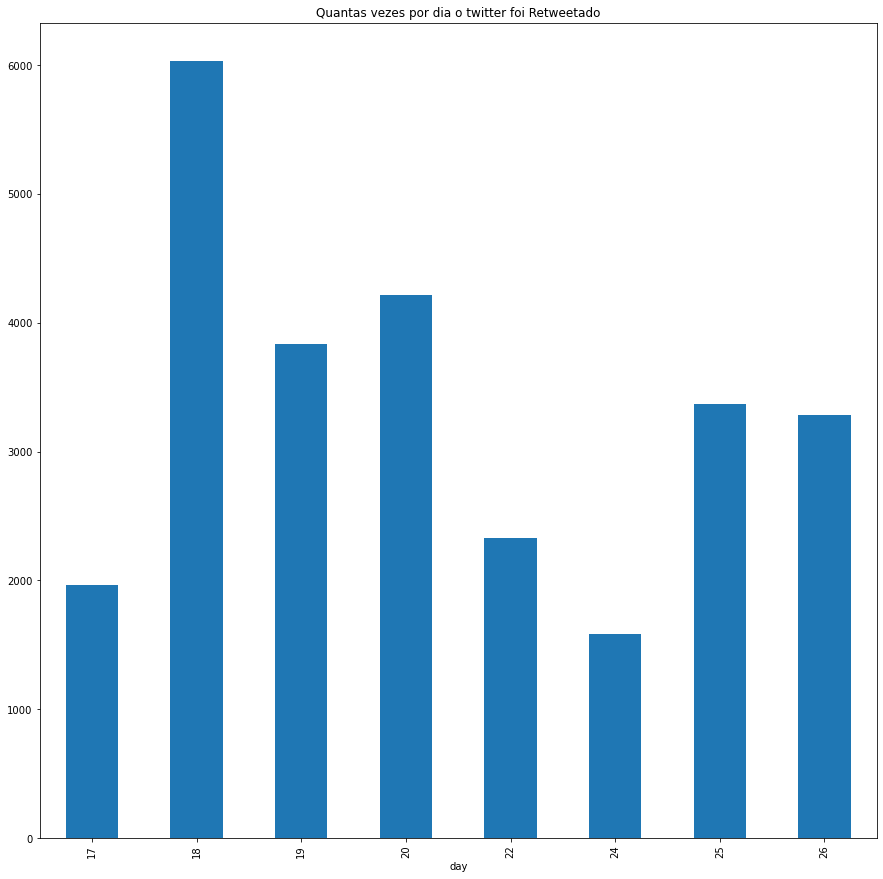

In [18]:
tweets_df.groupby('day').RTs.sum().plot(title='Quantas vezes por dia o twitter foi Retweetado',kind='bar', figsize=(15,15))


In [60]:
tweets_df['Tweets'][tweets_df.day==17]

31    &gt;@EstadaoEsporte Em vídeo, Lewis Hamilton f...
32    Ricardo Salles culpa 'visão ideológica' por au...
33    “As queimadas destruíram roças, queimaram casa...
34    Bolsonaro ignora queimadas e desmatamento e di...
36    Brasil sofre inquérito da ONU pelas queimadas,...
37    O Ministro do Meio Ambiente @rsallesmma esteve...
38    O Pantanal bateu o recorde histórico de queima...
39    Você tem ideia da dimensão das queimadas no Pa...
40    Recorde de queimadas, desmatamento, destruição...
41    A Pública conversou com um agente do PrevFogo,...
42    Dados de satélites são a base para o combate a...
43    Bolsonaro ignora queimadas e desmatamento e di...
44    A Marinha, por meio do Navio-Transporte Fluvia...
45    Ainda neste ano, o Inpe também registrou a mai...
Name: Tweets, dtype: object

Podemos verificar também de onde é a maior fonte de acessos dos tweets

In [20]:
sources = []
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

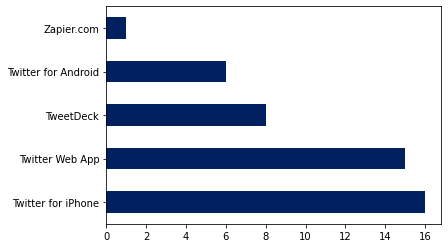

In [21]:
newDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sources_sorted = newDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#002060')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Análise de sentimento utilizando TextBlob. 
Obs: Neste caso, os termos em português serão traduzidos, pois TextBlob trabalha apenas com termos em inglês. 

Treinando o modelo

Obs: O ReLi (REsenha de LIvros) foi criado no âmbito do projeto Anotadores Semânticos baseados em Aprendizado Ativo, do LEARN, coordenado por Ruy Milidiú (Departamento de Informática - PUC-Rio). Consiste em 1600 resenhas de livros anotadas manualmente quanto à presença de opinião sobre o livro resenhado e sua polaridade. (Disponivel em https://www.linguateca.pt/Repositorio/ReLi/)

In [22]:
base_path = 'C:/Users/Lídia/Desktop/Python/Projeto_01/ReLi-Lex' 
train = []
wordsPT = []
wordsPT_sentiments = []

files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

for file in files:
    t = 1 if '_Positivos' in file else -1
    with open(file, 'r') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            wordsPT.append((w[1:-1]))
            wordsPT_sentiments.append(t)
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

In [23]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [24]:
def sentiment(tweet):
    
    polarity = 0
    
    #blob = TextBlob(tweet, classifier=cl)
    blob = TextBlob(clean_tweet(tweet), classifier=cl) #Clean Tweets
    
    for s in blob.sentences:
        polarity = s.classify() + polarity
    
    if polarity > 0:
        return 1
    elif polarity < 0:
        return -1
    else:
        return 0

In [25]:
def analize_sentimentEN(tweet):
    
    analysis = TextBlob(tweet)
    
    if analysis.detect_language() != 'en':
        analysis = TextBlob(str(analysis.translate(to='en')))
        time.sleep(0.5)    
        
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

Criar a coluna Classificação para armazenar os sentimentos

In [26]:
tweets_df['Classificacao'] = np.array([ analize_sentimentEN(tweet) for tweet in tweets_df['Tweets'] ])

Nesta etapa iremos verificar os tweets positivos e negativos e em seguida imprimiremos na tela a porcentagem de tweets positivos e negativos encontrados

In [27]:
pos_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['Classificacao'][index] > 0]
neg_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['Classificacao'][index] < 0]

In [28]:
print("Porcentagem de Tweets Positivos: {}%".format(len(pos_tweets)*100/len(tweets_df['Tweets'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(neg_tweets)*100/len(tweets_df['Tweets'])))

Porcentagem de Tweets Positivos: 32.608695652173914%
Porcentagem de Tweets Negativos: 26.08695652173913%


Representação gráfica

In [29]:
sentimento = [len(pos_tweets), len(neg_tweets)]
labels = ['Positivo' , 'Negativo']

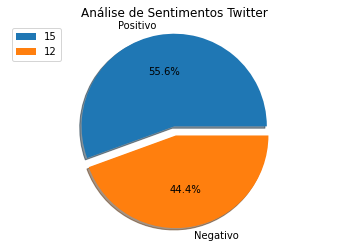

In [30]:
explode = (0.1, 0)
plt.pie(sentimento, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
plt.legend(sentimento, loc=2)
plt.title('Análise de Sentimentos Twitter') # adicionando o título do gráfico
plt.axis('equal')
plt.show()

In [31]:

stopwords= set(STOPWORDS)

new_words = []
with open("stopwords.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

In [32]:
words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

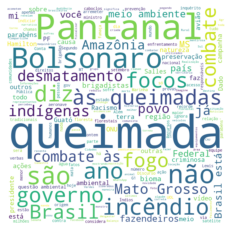

In [33]:
from imageio import imread
import warnings

warnings.simplefilter('ignore')

twitter_mask = imread('C:/Users/Lídia/Desktop/Python/Projeto_01/brasil.png')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               mask=twitter_mask,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('brasilword.png', dpi=300)
plt.show()

Processamento dos dados utilizando Stopwords e limpando os dados, removendo links, pontos, virgulas, ponto e virgula dos tweets (NLTK)

In [34]:
def Preprocessing(instancia):
     instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
     stopwords = set(nltk.corpus.stopwords.words('portuguese'))
     palavras = [i for i in instancia.split() if not i in stopwords]
     return (" ".join(palavras))

In [35]:
# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [36]:
tweets[:50]

['balanço semana cidades+verdes cau / cadastro ambiental rural audiência pública combate queimadas pantanal',
 'focos incêndio acometem pantanal outros biomas brasileiros, área queimada todo território nacional menor últimos 18 anos dados @inpe_mct revelam 2007 ano brasil sofreu queimadas',
 'queimadas novidade felizmente, situação recente melhor fatos evidenciam toda histeria torno questão ambiental passa narrativa mentirosa, criada desgastar governo brasil representantes',
 'imagine fazer parte grupo facebook whatsapp alguém manda foto mostrando floresta pegando fogo animal morto queimadas imediatamente considera inimigo “comunista” significa tornou monstro percebeu',
 'f recursos enfrentamento chamas pantanal @mdregional_br destina r$ 13,9 milhões combate queimadas aquisição equipamentos, locação veículos, maquinários aeronaves realização 32 ações mato grosso 37 mato grosso sul @rogeriosmarinho',
 '“índios caboclos?” pf provas indiciar fazendeiros ms queimadas pantanal 25/09/2020 uo

Tokenização
- Existe uma biblioteca que possui um pacote específico de tweets

In [37]:
from nltk.tokenize import TweetTokenizer

In [38]:
tweet_tokenizer = TweetTokenizer()

In [39]:
for token , row in tweets_df.iterrows():
    tk=tweet_tokenizer.tokenize(str(row['Tweets']).lower())

In [40]:
    df_token_tmp = pd.DataFrame()
    df_token_tmp["Palavra"] = [palavra for palavra in tk if palavra not in stopwords]
    df_token_tmp["Classificacao"] = row['Classificacao']


In [41]:
df_token_tmp[:50]

,Palavra,Classificacao
0,ainda,0
1,neste,0
2,ano,0
3,",",0
4,o,0
5,inpe,0
6,também,0
7,registrou,0
8,maior,0
9,taxa,0


In [42]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

In [43]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [44]:
# Separando tweets e suas classes:
tweets = tweets_df['Tweets']
classes = tweets_df['Classificacao']

In [45]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [46]:
freq_testes = vectorizer.transform(tweets_df)

In [47]:
for t, c in zip (tweets_df,modelo.predict(freq_testes)):
    print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]


array([[0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33],
       [0.26, 0.41, 0.33]])

In [48]:
tweetsarray = []

for tw in tweets_df['Tweets']:
    text = clean_tweet(tw)
    tweetsarray.append(text)

In [49]:
predictionData = vectorizer.transform(tweets_df['Tweets'])
tweets_df['Classificacao NLTK'] = modelo.predict(predictionData)

In [50]:
pos_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['Classificacao NLTK'][index] > 0]
neg_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['Classificacao NLTK'][index] < 0]

In [51]:
print("Porcentagem de Tweets Positivos: {}%".format(len(pos_tweets)*100/len(tweets_df['Tweets'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(neg_tweets)*100/len(tweets_df['Tweets'])))

Porcentagem de Tweets Positivos: 32.608695652173914%
Porcentagem de Tweets Negativos: 26.08695652173913%


In [52]:
sentimento = [len(pos_tweets), len(neg_tweets)]
labels = ['Positivo' , 'Negativo']

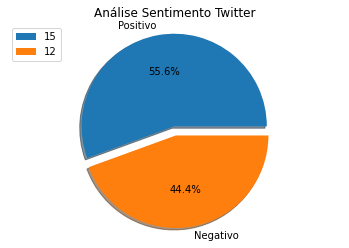

In [53]:
explode = (0.1, 0)
plt.pie(sentimento, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
plt.legend(sentimento, loc=2)
plt.title('Análise Sentimento Twitter') # adicionando o título do gráfico
plt.axis('equal')
plt.show()

In [54]:
geolocator = Nominatim(user_agent="TweeterSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [55]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=3.)

mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('TweetsQueimadas.html')
mapa